In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
df = pd.read_csv('questions.csv')
df.head()

,answer_id,question
0,1,What email address can I use for Azure for Edu...
1,1,What is Azure for Education?
2,1,What is Azure?
3,1,How do I register for Azure?
4,1,What can I do with Azure?


In [3]:
# From https://towardsdatascience.com/5-simple-ways-to-tokenize-text-in-python-92c6804edfc4#33a2
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['question'])
y = df['answer_id']

df_tfid = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df_tfid.head()

,address,advising,advisor,azure,bad,break,calendar,check,classes,cost,...,semester,spring,start,state,summer,talk,tuition,use,winter,wright
0,0.516658,0.0,0.0,0.279128,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.420079,0.0,0.0
1,0.000000,0.0,0.0,0.518630,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.000000,0.0,0.0,0.518630,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [4]:
X_transformed = LinearDiscriminantAnalysis().fit_transform(X.toarray(), y)

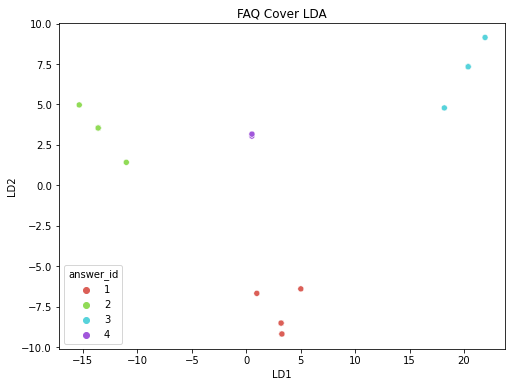

In [5]:
# LDA Scatter Plot
plt.figure(figsize=[8,6])
p = sns.scatterplot(
    x=X_transformed[:,0],
    y=X_transformed[:,1],
    hue=y,
    palette=sns.color_palette("hls", 4),
    )

p.set(title="FAQ Cover LDA", xlabel="LD1", ylabel="LD2")
plt.show()